tensor([[-0.7274],
        [-0.7273],
        [-0.7272],
        [-0.7271],
        [-0.7270]], grad_fn=<AddmmBackward0>)
tensor([-0.0010, -0.0005,  0.0000,  0.0005,  0.0010])


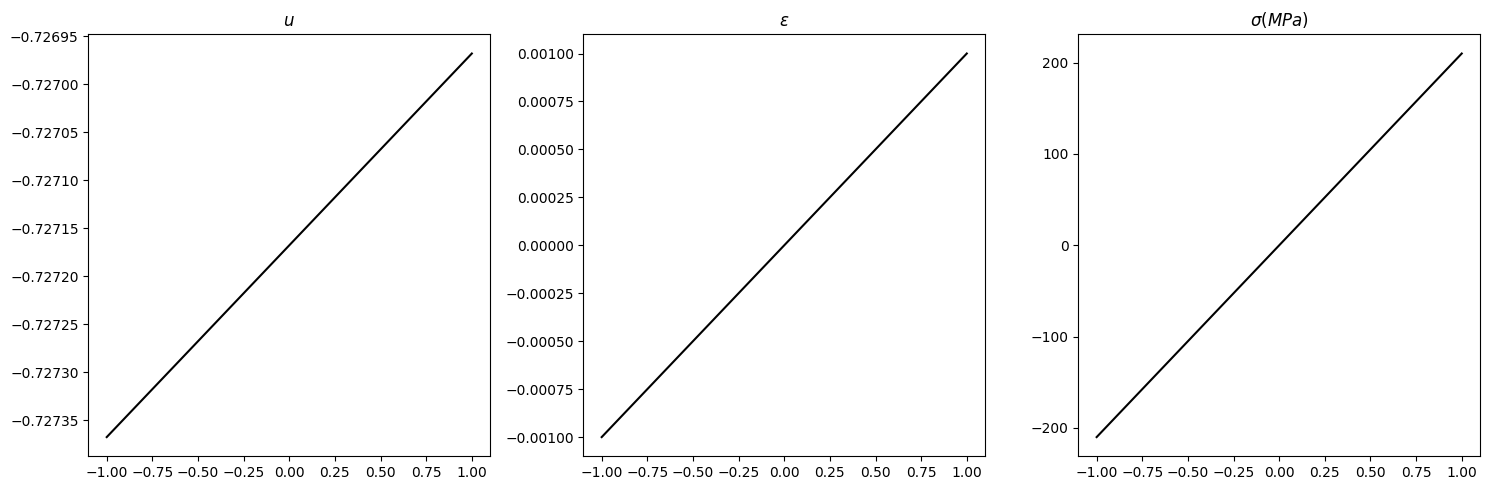

In [23]:
# Ex 3

import torch
import matplotlib.pyplot as plt
from torch.autograd import grad

# perceptron parameters and perceptron definition

w = 200.0E-6
b = 1
y = torch.nn.Linear(1,1)
#É o input para criar uma camada linear, com uma matriz de peso e bias

y.weight.data = torch.tensor([[w]])
y.weight.bias = torch.tensor([b])
#Informo os valores que quero nessa transformação linear

# spatial grid creation

nx = 5
x = torch.linspace(-1, 1, nx, requires_grad=True).unsqueeze(1)
# É o input para ter 5 números igualmetne espaçados de -1 até 1 (Ficando no formato 5x1)
# unsqueeze(1) é o input para criar uma Dimensão a mais, um input 2D é mais facil de operar nas redes neurais

# sample displacement field at points on x vector
d = y(x)

print(d)
# gradient computation of modeled displacement field

dd_dx = grad(d, x, torch.ones_like(x), create_graph=True, retain_graph=True)[0]

# strain computation


# eps = dd_dx

#Variando o valor de deslocamento para os gráficos
eps = torch.linspace(-0.001, 0.001,5)

print(eps)

#stress computation
E = 210.0E3

sigma = eps*E

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(x.detach(), d.detach(), "k")
ax[0].set_title("$u$")
#Grafico 1
ax[1].plot(x.detach(), eps.detach(), "k")
ax[1].set_title("$\\varepsilon$")
#Grafico 2
ax[2].plot(x.detach(), sigma.detach(), "k")
ax[2].set_title("$\\sigma (MPa)$")
#Grafico 3
fig.tight_layout()
plt.show()

# Comentários:Se usarmos a linha de "eps = dd_dx)" O 3° Gráfico é apresentado como uma reta, pois o comando dado para eps foi o gradiente, como a rede neural setada teve o peso de 200.0e-6 retornou este valor, por isso o tensor "eps" possui valor constatne de 2e-4 em todos os valores de x, tivemos esse valor.

# Inseri a deformação de -0.001 até 0.001 para desenvolvimento próprio.